# Exploratory Data Analysis

File Name: exploratory_data_analysis.ipynb
Purpose: Data visualization
Outline:
1. Location Map: Fig1
2. Geolocation of spills: Fig2
3. Draw Tradeoff plot (Fig3a)
4. Draw cluster (Fig3b)

Developer: Tanmoy Das
Date: March 2023

In [1]:
# Import Python libraries
import pandas as pd

import geopandas as gpd
import shapely
import custom_func, eda

import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

H:\My Drive\PhD Tan 2023\Python Implementation of MIPs\MIP-Python-Lamoscad\eda.py:61: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  linestring = geom.explode()
H:\My Drive\PhD Tan 2023\Python Implementation of MIPs\MIP-Python-Lamoscad\mip_venv\Lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [10]:
#
# Load geometric file for map
ArcticMap = gpd.read_file("Inputs/ArcGIS_data/ArcticShapefile2/ArcticShapefile2.shp")
ArcticMap = ArcticMap.to_crs(epsg=4326)  # 3857
ArcticLand = ArcticMap[ArcticMap['Region_EN'].isin(['Arctic'])]
ArcticWater = ArcticMap[ArcticMap['Region_EN'].isin(['Arctic-Water'])]

current_st = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='current')
acp2 = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='stations')

In [3]:
current_st

,Station #,FacilityLocation,Coordinates,m,c,r,Capacity
0,s6,Hay River,"(60.758054, -115.789890)",0,1400,4000,700
1,s9,Churchill,"(58.55084,-93.62352)",78,800,800,200
2,s200,Tuktoyaktuk,"(69.459, -132.974304)",50,100,257,250
3,s300,Iqaluit,"(63.742885, -68.464958)",24,200,400,300


In [4]:
coordinates_current_st = custom_func.extract_station_coordinate(current_st)
coordinate_current_st_df = pd.DataFrame(coordinates_current_st[0])
coordinate_current_st_df.columns = ['Latitude','Longitude']
coordinate_current_st_df['Capacity'] = current_st['Capacity'].copy()
coordinate_current_st_df['FacilityLocation'] = current_st['FacilityLocation'].copy()

coordinates_acp = custom_func.extract_station_coordinate(acp2)
coordinate_df_acp = pd.DataFrame(coordinates_acp[0])
coordinate_df_acp.columns = ['Latitude','Longitude']
coordinate_df_acp['Capacity'] = acp2['Capacity'].copy()

# Fig3

## (a) Current response stations and cache

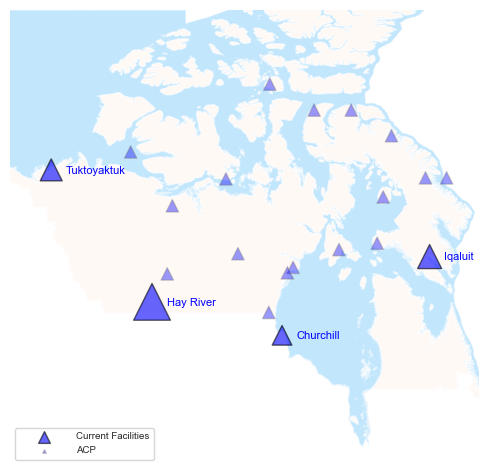

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
ArcticLandPlot = ArcticLand.plot(ax=ax, color="seashell", alpha=.5)  # ax=ax,
ArcticWaterPlot = ArcticWater.plot(ax=ax, color="lightskyblue", alpha=.5)

st = plt.scatter(data=coordinate_current_st_df,
                 x='Longitude', y='Latitude', marker='^', alpha=0.6, s='Capacity',
                 c='blue', edgecolors='black')

for i in range(len(coordinate_current_st_df)):
    plt.text(x=coordinate_current_st_df.Longitude[i] + 2.5, y=coordinate_current_st_df.Latitude[i] - .25,
             s=coordinate_current_st_df.FacilityLocation[i],  # loc[:, 'Station #'][i],
             fontdict=dict(color='blue', size=8))
# Facility location

acp22 = plt.scatter(data=coordinate_df_acp,
                 x='Longitude', y='Latitude', marker='^', alpha=0.4, s='Capacity',
                 c='blue', edgecolors='gray')

plt.legend((st, acp22),
           ('Current Facilities', 'ACP'),
           loc='lower left',
           ncol=1, handlelength=5, borderpad=.5, markerscale=.4,
           fontsize=7)

ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.grid(False)
plt.axis('off')
#plt.show()
plt.tight_layout()
fig.savefig(f'Outputs/Fig3a current facilities & cache.png', transparent=True)

## (b) Sensitive areas

In [6]:
# Load geometric file for map
gerome_ = gpd.read_file("Inputs/ArcGIS_data/Gerome2/Sensitivity_data_Gerome.shp")
marine_protective_area = gpd.read_file("Inputs/ArcGIS_data/Northern_Canada_2011/shapefiles/LCC_NAD83/prot_areas_p.shp")
indigenous_population = gpd.read_file("Inputs/ArcGIS_data/Northern_Canada_2011/shapefiles/LCC_NAD83/popplace_pt.shp")
gerome_shp = gerome_.to_crs(epsg=4326)
marine_protective_area = marine_protective_area.to_crs(epsg=4326)
indigenous_population_area = indigenous_population.to_crs(epsg=4326)

In [7]:
gerome_shp['Sensitivity_n'] = (gerome_shp['Sensitivit']-min(gerome_shp['Sensitivit']))/(max(gerome_shp['Sensitivit'])-min(gerome_shp['Sensitivit']))

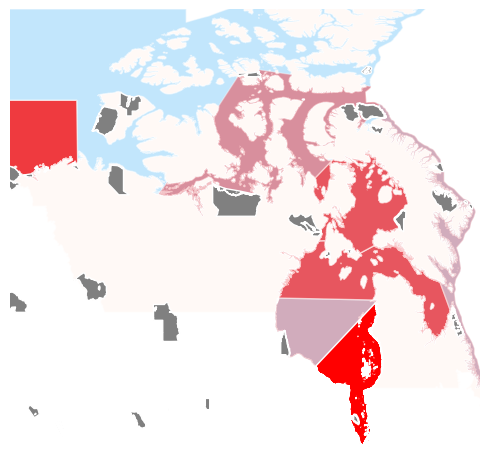

In [8]:
fig, ax = plt.subplots(figsize=(5,5))  #++ figsize=(8,8)
ArcticLandPlot = ArcticLand.plot(ax=ax, color="seashell", alpha=.5)  # ax=ax,
ArcticWaterPlot = ArcticWater.plot(ax=ax, color="lightskyblue", alpha=.5)

gerome_plot = gerome_shp.plot(ax=ax, color='red', alpha=gerome_shp['Sensitivity_n']) # color="lightskyblue",
mpa_plot = marine_protective_area.plot(ax=ax, color='gray', zorder=2)


ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.axis('off')
plt.tight_layout()
fig.savefig(f'Outputs/Fig 3b Sensitivity only.png', transparent=True)

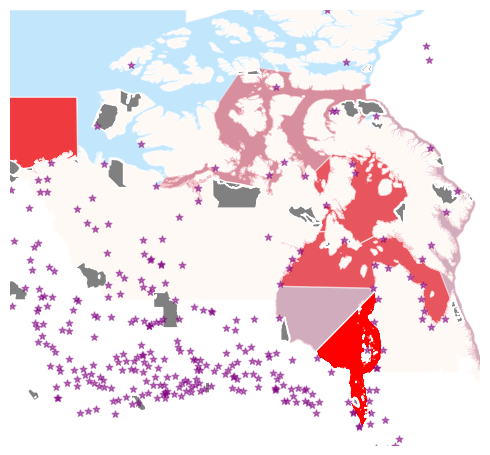

In [9]:
fig, ax = plt.subplots(figsize=(5,5))  #++ figsize=(8,8)
ArcticLandPlot = ArcticLand.plot(ax=ax, color="seashell", alpha=0.5)  # ax=ax,
ArcticWaterPlot = ArcticWater.plot(ax=ax, color="lightskyblue", alpha=0.5)

gerome_plot = gerome_shp.plot(ax=ax, color='red', alpha=gerome_shp['Sensitivity_n']) # color="lightskyblue",
mpa_plot = marine_protective_area.plot(ax=ax, color='gray', zorder=2)

mpa_plot = indigenous_population_area.plot(ax=ax, marker='*',markersize=25, color='purple', zorder=3, alpha=.5)


ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.axis('off')
plt.tight_layout()
fig.savefig(f'Outputs/Fig3b Sensitivity & population.png', transparent=True)

## (c) Shipping route

## (d) Oil spills

In [8]:
spill_data = pd.read_excel('Inputs/data_100_oil_spills.xlsx', sheet_name='spills', header=0).copy()
name = 'spill points'

coordinates = custom_func.extract_coordinate(spill_data)
coordinate_df = pd.DataFrame(coordinates[0])
coordinate_df.columns = ['Latitude', 'Longitude']
coordinate_gdf = gpd.GeoDataFrame(
    coordinate_df, geometry=gpd.points_from_xy(coordinate_df.Longitude, coordinate_df.Latitude))
coordinate_gdf = coordinate_gdf.set_crs(epsg=4326)

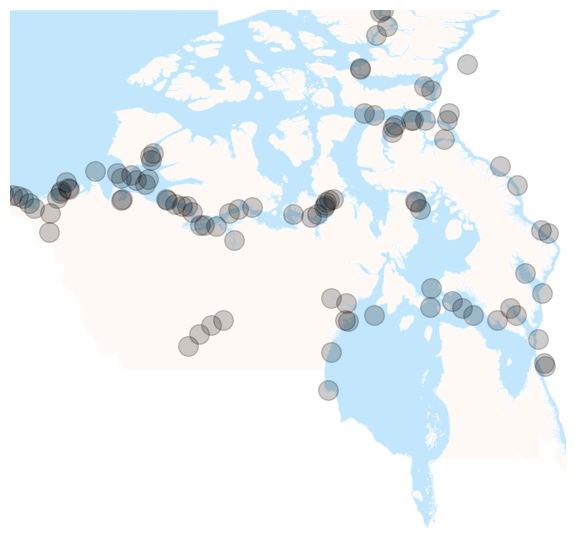

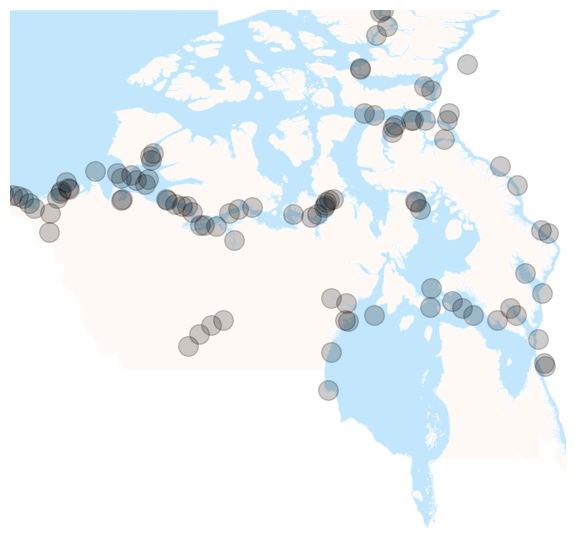

In [12]:
fig, ax = plt.subplots(figsize=(8,7))

ArcticLandPlot = ArcticLand.plot(ax=ax, color="seashell", alpha=.5)  # ax=ax,
ArcticWaterPlot = ArcticWater.plot(ax=ax, color="lightskyblue", alpha=.5)

plt.scatter(data=coordinate_gdf,
                 x='Longitude', y='Latitude', marker='o', alpha=.2, s=200,
                 # s=amountSt_groupby['amountSt_display'],
                 c='black')

ax.set_xlim([-140, -60])
ax.set_ylim([50, 80])
ax.axis('off')
plt.show()
fig.savefig(f'Outputs/{name}.png', transparent=True, dpi=600)

# Transparent Figures for presentation

## Current facilities

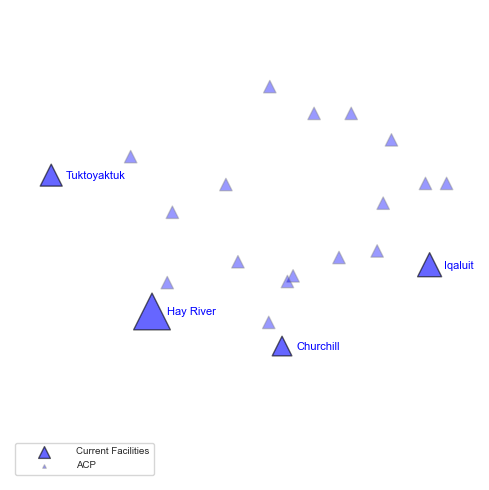

In [10]:
fig, ax = plt.subplots(figsize=(5,5))


st = plt.scatter(data=coordinate_current_st_df,
                 x='Longitude', y='Latitude', marker='^', alpha=0.6, s='Capacity',
                 c='blue', edgecolors='black')

for i in range(len(coordinate_current_st_df)):
    plt.text(x=coordinate_current_st_df.Longitude[i] + 2.5, y=coordinate_current_st_df.Latitude[i] - .25,
             s=coordinate_current_st_df.FacilityLocation[i],  # loc[:, 'Station #'][i],
             fontdict=dict(color='blue', size=8))
# Facility location

acp33 = plt.scatter(data=coordinate_df_acp,
                 x='Longitude', y='Latitude', marker='^', alpha=0.4, s='Capacity',
                 c='blue', edgecolors='gray')

plt.legend((st, acp33),
           ('Current Facilities', 'ACP'),
           loc='lower left',
           ncol=1, handlelength=5, borderpad=.5, markerscale=.4,
           fontsize=7)

ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.grid(False)
plt.axis('off')
#plt.show()
plt.tight_layout()
fig.savefig(f'Outputs/Fig4a current facilities & cache.png', transparent=True)

## Number text in stations

In [11]:
coordinate_df_acp

,Latitude,Longitude,Capacity
0,70.000000,-134.000000,0
1,70.639999,-119.430000,80
2,67.089996,-112.320000,80
3,62.599998,-113.190002,80
4,60.529999,-114.379997,0
5,68.860001,-103.190002,80
6,63.930000,-101.139999,80
7,60.060001,-95.889999,80
8,75.110001,-95.709999,80
9,63.029999,-91.739998,80


In [12]:
acp2

,no.,Station #,Station,Name,Coordinates,skimmers,booms,dispersant,burning,Resources total,Converted resources,Capacity,Unnamed: 12,Unnamed: 13
0,1,s1,Station 1,Beafort sea,"(70,-134)",0,1,33,NaN,34,NaN,0,NaN,NaN
1,2,s2,Station 2,Northwestern passage,"(70.64, -119.43)",8,8,55,NaN,71,NaN,80,NaN,NaN
2,3,s3,Station 3,Kitikmeot Region,"(67.09, -112.32)",1,4,58,NaN,63,NaN,80,NaN,NaN
3,4,s4,Station 4,Fort Smith,"(62.60, -113.19)",10,3,32,NaN,45,NaN,80,NaN,NaN
4,5,s5,Station 5,Hay River,"(60.53, -114.38)",40,10,100,NaN,150,NaN,0,NaN,NaN
5,6,s6,Station 6,NaN,"(68.86,-103.19)",10,3,44,NaN,57,NaN,80,NaN,"(60.758054, -115.789890)"
6,7,s7,Station 7,NaN,"(63.93, -101.14)",0,3,47,NaN,50,NaN,80,NaN,"(58.55084,-93.62352)"
7,8,s8,Station 8,NaN,"(60.06, -95.89)",3,5,58,NaN,66,NaN,80,NaN,"(69.459, -132.974304)"
8,9,s9,Station 9,NaN,"(75.11, -95.71)",5,7,59,NaN,71,NaN,80,NaN,"(63.742885, -68.464958)"
9,10,s10,Station 10,Kivalliq Region,"(63.03, -91.74)",4,9,36,NaN,49,NaN,80,NaN,NaN


In [13]:
display(coordinate_df_acp)
display(acp2)
#acp02 = acp2.join(coordinate_df_acp) # pd.merge(coordinate_df_acp,current_st[['FacilityLocation','Station #']],on='FacilityLocation', how='left')

acp03 = pd.concat([coordinate_df_acp, acp2], axis=1)
#coordinate_st_df3 = acp2.rename(columns={"Station #": "Station#"})
acp03.rename(columns={"Station #": "StationNo"}, inplace=True)
display(acp03)

,Latitude,Longitude,Capacity
0,70.000000,-134.000000,0
1,70.639999,-119.430000,80
2,67.089996,-112.320000,80
3,62.599998,-113.190002,80
4,60.529999,-114.379997,0
5,68.860001,-103.190002,80
6,63.930000,-101.139999,80
7,60.060001,-95.889999,80
8,75.110001,-95.709999,80
9,63.029999,-91.739998,80


,no.,Station #,Station,Name,Coordinates,skimmers,booms,dispersant,burning,Resources total,Converted resources,Capacity,Unnamed: 12,Unnamed: 13
0,1,s1,Station 1,Beafort sea,"(70,-134)",0,1,33,NaN,34,NaN,0,NaN,NaN
1,2,s2,Station 2,Northwestern passage,"(70.64, -119.43)",8,8,55,NaN,71,NaN,80,NaN,NaN
2,3,s3,Station 3,Kitikmeot Region,"(67.09, -112.32)",1,4,58,NaN,63,NaN,80,NaN,NaN
3,4,s4,Station 4,Fort Smith,"(62.60, -113.19)",10,3,32,NaN,45,NaN,80,NaN,NaN
4,5,s5,Station 5,Hay River,"(60.53, -114.38)",40,10,100,NaN,150,NaN,0,NaN,NaN
5,6,s6,Station 6,NaN,"(68.86,-103.19)",10,3,44,NaN,57,NaN,80,NaN,"(60.758054, -115.789890)"
6,7,s7,Station 7,NaN,"(63.93, -101.14)",0,3,47,NaN,50,NaN,80,NaN,"(58.55084,-93.62352)"
7,8,s8,Station 8,NaN,"(60.06, -95.89)",3,5,58,NaN,66,NaN,80,NaN,"(69.459, -132.974304)"
8,9,s9,Station 9,NaN,"(75.11, -95.71)",5,7,59,NaN,71,NaN,80,NaN,"(63.742885, -68.464958)"
9,10,s10,Station 10,Kivalliq Region,"(63.03, -91.74)",4,9,36,NaN,49,NaN,80,NaN,NaN


,Latitude,Longitude,Capacity,no.,StationNo,Station,Name,Coordinates,skimmers,booms,dispersant,burning,Resources total,Converted resources,Capacity,Unnamed: 12,Unnamed: 13
0,70.000000,-134.000000,0,1,s1,Station 1,Beafort sea,"(70,-134)",0,1,33,NaN,34,NaN,0,NaN,NaN
1,70.639999,-119.430000,80,2,s2,Station 2,Northwestern passage,"(70.64, -119.43)",8,8,55,NaN,71,NaN,80,NaN,NaN
2,67.089996,-112.320000,80,3,s3,Station 3,Kitikmeot Region,"(67.09, -112.32)",1,4,58,NaN,63,NaN,80,NaN,NaN
3,62.599998,-113.190002,80,4,s4,Station 4,Fort Smith,"(62.60, -113.19)",10,3,32,NaN,45,NaN,80,NaN,NaN
4,60.529999,-114.379997,0,5,s5,Station 5,Hay River,"(60.53, -114.38)",40,10,100,NaN,150,NaN,0,NaN,NaN
5,68.860001,-103.190002,80,6,s6,Station 6,NaN,"(68.86,-103.19)",10,3,44,NaN,57,NaN,80,NaN,"(60.758054, -115.789890)"
6,63.930000,-101.139999,80,7,s7,Station 7,NaN,"(63.93, -101.14)",0,3,47,NaN,50,NaN,80,NaN,"(58.55084,-93.62352)"
7,60.060001,-95.889999,80,8,s8,Station 8,NaN,"(60.06, -95.89)",3,5,58,NaN,66,NaN,80,NaN,"(69.459, -132.974304)"
8,75.110001,-95.709999,80,9,s9,Station 9,NaN,"(75.11, -95.71)",5,7,59,NaN,71,NaN,80,NaN,"(63.742885, -68.464958)"
9,63.029999,-91.739998,80,10,s10,Station 10,Kivalliq Region,"(63.03, -91.74)",4,9,36,NaN,49,NaN,80,NaN,NaN


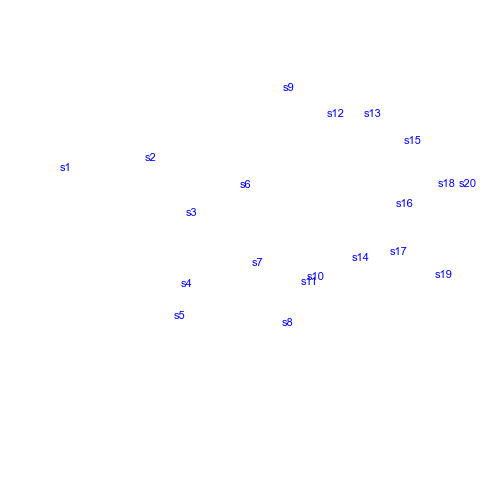

In [18]:
fig, ax = plt.subplots(figsize=(5,5))


for i in range(len(acp03)):
    plt.text(x=acp03.Longitude[i] + 2.5, y=acp03.Latitude[i] - .25,
             s=acp03.StationNo[i],  # loc[:, 'Station #'][i],
             fontdict=dict(color='blue', size=8))
"""
# Facility location
st = plt.scatter(data=acp03,
                 x='Longitude', y='Latitude', marker='^', alpha=0.6, s='dispersant',
                 c='blue', edgecolors='black')
acp = plt.scatter(data=coordinate_df_acp,
                 x='Longitude', y='Latitude', marker='^', alpha=0.4, s='Capacity',
                 c='blue', edgecolors='gray')

plt.legend((st, acp),
           ('Current Facilities', 'ACP'),
           loc='lower left',
           ncol=1, handlelength=5, borderpad=.5, markerscale=.4,
           fontsize=7)
"""
ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.grid(False)
plt.axis('off')
#plt.show()
plt.tight_layout()
fig.savefig(f'Outputs/Fig4a (text) current facilities & cache.png', transparent=True)

## Proposed station coordinates

In [ ]:
#
dataframe = pd.read_excel('Outputs/current vs proposed.xlsx', sheet_name='proposed coordinates')


fig, ax = plt.subplots() #figsize=(8,3)
coordinates_spill = custom_func.extract_station_coordinate(dataframe)
coordinate_df = pd.DataFrame(coordinates_spill[0])
coordinate_df.columns = ['Latitude','Longitude']
coordinate_gdf = gpd.GeoDataFrame(
    coordinate_df, geometry=gpd.points_from_xy(coordinate_df.Longitude, coordinate_df.Latitude))
coordinate_gdf = coordinate_gdf.set_crs(epsg=4326)
st = plt.scatter(data=coordinate_df,
                 x='Longitude', y='Latitude', marker='s', alpha=1, s=200,
                 c='yellow')
ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.axis('off')
fig.savefig(f'Outputs/proposed_stations.png', transparent=True)

## Shapefile to transparent fig

## Shipping Route

++ need to replace Fig3(c)

In [ ]:
import eda
import geopandas as gpd
file_url = "Inputs/ArcGIS_data/Shipping_and_Hydrography/Canadian_Shipping_Routes.shp"
name = 'shipping_route'
#Map_Plot = eda.plot_shp_to_transparent_fig(file_url, name)

In [ ]:
fig, ax = plt.subplots(figsize=(8,7))  #++ figsize=(8,8)
# plt.figure()
# Load geometric file for map
Map_shp = gpd.read_file(file_url)
Map_shp = Map_shp.to_crs(epsg=4326)  # 3857
Map_Plot = Map_shp.plot(ax=ax,  alpha=.5) # color="lightskyblue",
ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.grid(False)
ax.axis('off')
fig.savefig(f'Outputs/{name}.png', transparent=True)

## Sensitivity


In [ ]:
import eda
file_url = "Inputs/ArcGIS_data/Gerome2/Sensitivity_data_Gerome.shp"
name = 'Sensitivity'
eda.plot_shp_to_transparent_fig(file_url, name)

In [ ]:
import geopandas as gpd
# plt.figure()
# Load geometric file for map
Map_shp = gpd.read_file(file_url)
Map_shp = Map_shp.to_crs(epsg=4326)  # 3857
Map_shp

In [ ]:
Map_shp['Sensitivity_n'] = (Map_shp['Sensitivit']-min(Map_shp['Sensitivit']))/(max(Map_shp['Sensitivit'])-min(Map_shp['Sensitivit']))


In [ ]:
display(Map_shp)

In [ ]:
fig, ax = plt.subplots(figsize=(8,7))  #++ figsize=(8,8)
Map_Plot = Map_shp.plot(ax=ax, color='red', alpha=Map_shp['Sensitivity_n']) # color="lightskyblue",
ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
ax.axis('off')
fig.savefig(f'Outputs/{name}.png', transparent=True)

In [ ]:
max(Map_shp['Sensitivit'])

## Spill coordinates as transparent fig

In [1]:
import eda
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import custom_func

H:\My Drive\PhD Tan 2023\Python Implementation of MIPs\MIP-Python-Lamoscad\eda.py:61: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  linestring = geom.explode()
H:\My Drive\PhD Tan 2023\Python Implementation of MIPs\MIP-Python-Lamoscad\mip_venv\Lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [2]:
# spill_data = pd.read_excel('Inputs/data_oil_spill_resource_allocation_Arctic_2023.xlsx', sheet_name='spills', header=0).copy()
spill_data = pd.read_excel('Inputs/data_100_oil_spills.xlsx', sheet_name='spills', header=0).copy()
name = 'spill points'

,Unnamed: 0,Spill #,Coordinates,Spill size,Spill Size Type,Resource needed,1st Ranking,Skimmer,Dispersant,Burning materials
0,73,o74,"(64.50421666200003, -79.40601964599995)",8500,Large,425.0,CDU,0,800,0
1,97,o98,"(73.85872545439102, -77.06292927588505)",4820,Large,241.0,MCR,54,0,0
2,52,o53,"(58.851133884186325, -94.20693472697955)",3200,Large,160.0,ISB,0,0,257
3,177,o178,"(69.45553911240434, -123.85642478117892)",6160,Large,308.0,MCR,54,0,0
4,202,o203,"(65.38888826422587, -65.95218121659215)",5190,Large,259.5,ISB,0,0,257
...,...,...,...,...,...,...,...,...,...,...
95,206,o207,"(61.2787986028355, -114.41660450627202)",6480,Large,324.0,MCR,54,0,0
96,42,o43,"(70.5897855138361, -120.20613457011686)",5790,Large,289.5,ISB,0,0,257
97,191,o192,"(68.70553599203063, -134.23381941293684)",6430,Large,321.5,ISB,0,0,257
98,173,o174,"(72.04548849091111, -119.40991256546548)",800,Small,40.0,CDU,0,100,0


In [4]:
spill_data

,Unnamed: 0,Spill #,Coordinates,Spill size,Spill Size Type,Resource needed,1st Ranking,Skimmer,Dispersant,Burning materials
0,73,o74,"(64.50421666200003, -79.40601964599995)",8500,Large,425.0,CDU,0,800,0
1,97,o98,"(73.85872545439102, -77.06292927588505)",4820,Large,241.0,MCR,54,0,0
2,52,o53,"(58.851133884186325, -94.20693472697955)",3200,Large,160.0,ISB,0,0,257
3,177,o178,"(69.45553911240434, -123.85642478117892)",6160,Large,308.0,MCR,54,0,0
4,202,o203,"(65.38888826422587, -65.95218121659215)",5190,Large,259.5,ISB,0,0,257
...,...,...,...,...,...,...,...,...,...,...
95,206,o207,"(61.2787986028355, -114.41660450627202)",6480,Large,324.0,MCR,54,0,0
96,42,o43,"(70.5897855138361, -120.20613457011686)",5790,Large,289.5,ISB,0,0,257
97,191,o192,"(68.70553599203063, -134.23381941293684)",6430,Large,321.5,ISB,0,0,257
98,173,o174,"(72.04548849091111, -119.40991256546548)",800,Small,40.0,CDU,0,100,0


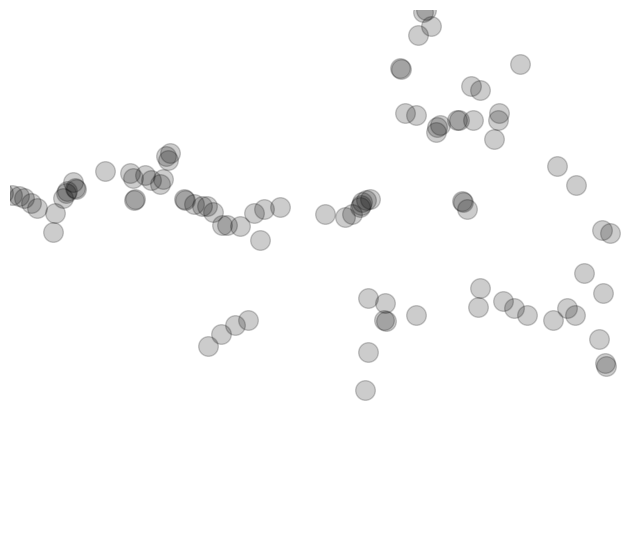

In [6]:
fig, ax = plt.subplots(figsize=(8,7))
coordinates = custom_func.extract_coordinate(spill_data)
coordinate_df = pd.DataFrame(coordinates[0])
coordinate_df.columns = ['Latitude', 'Longitude']
coordinate_gdf = gpd.GeoDataFrame(
    coordinate_df, geometry=gpd.points_from_xy(coordinate_df.Longitude, coordinate_df.Latitude))
coordinate_gdf = coordinate_gdf.set_crs(epsg=4326)

plt.scatter(data=coordinate_gdf,
                 x='Longitude', y='Latitude', marker='o', alpha=.2, s=200,
                 # s=amountSt_groupby['amountSt_display'],
                 c='black')

ax.set_xlim([-140, -60])
ax.set_ylim([50, 80])
ax.axis('off')
plt.show()
fig.savefig(f'Outputs/{name}.png', transparent=True)

In [ ]:
import geopandas as gpd
fig, ax = plt.subplots(figsize=(8,7))  #++ figsize=(8,8)
# plt.figure()
# Load geometric file for map
ArcticMap = gpd.read_file("Inputs/ArcGIS_data/ArcticShapefile2/ArcticShapefile2.shp")
ArcticMap = ArcticMap.to_crs(epsg=4326)  # 3857
ArcticLand = ArcticMap[ArcticMap['Region_EN'].isin(['Arctic'])]
ArcticWater = ArcticMap[ArcticMap['Region_EN'].isin(['Arctic-Water'])]
ArcticLandPlot = ArcticLand.plot(ax=ax, color="seashell", alpha=.5)  # ax=ax,
ArcticWaterPlot = ArcticWater.plot(ax=ax, color="lightskyblue", alpha=.5)
ax.set_xlim([-140,-60])
ax.set_ylim([50, 80])
fig.savefig(f'Outputs/Arctic_transparent.png', transparent=True)
# plt.show()